In [7]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
RESULTS_PATH = './results/'
TESTS = ['test_1', 'test_3']
EXTENSION = '.json'

In [8]:
with open(RESULTS_PATH + TESTS[0] + EXTENSION) as f:
    test_1 = json.load(f)[TESTS[0]]
df_t1 = pd.DataFrame(test_1)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t1['best_fit'] = df_t1['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t1.head(None)
# # Drop where function = HolderTableFunction:
# df_t1 = df_t1[df_t1['function'] != 'HolderTableFunction']

algorithm        function function_type  dimension  \
0                       TensorCro  AckleyFunction  local_minima        500   
1                GeneticAlgorithm  AckleyFunction  local_minima        500   
2                    PSOAlgorithm  AckleyFunction  local_minima        500   
3          HarmonySearchAlgorithm  AckleyFunction  local_minima        500   
4     SimulatedAnnealingAlgorithm  AckleyFunction  local_minima        500   
...                           ...             ...           ...        ...   
4795                    TensorCro          Powell         other        350   
4796             GeneticAlgorithm          Powell         other        350   
4797                 PSOAlgorithm          Powell         other        350   
4798       HarmonySearchAlgorithm          Powell         other        350   
4799  SimulatedAnnealingAlgorithm          Powell         other        350   

           best_fit                                           best_ind  \
0          1.689693  [0.8795084953308105, 0.008874413557350636, 0.0...   
1         15.836116  [2.332674988463067, 2.0189780397871484, -8.065...   
2         20.426127  [-7.134469135488038, -17.219824480502965, -24....   
3         21.035342  [3.3558531622379593, -13.392862411763002, -7.5...   
4         21.316629  [-9.768631717118826, 3.1966465588896313, -13.8...   
...             ...                                                ...   
4795     179.973984  [1.3504338264465332, -0.11417263746261597, 0.4...   
4796    5121.542776  [-0.3390777035955329, 0.5119830120632831, 0.79...   
4797   53684.331706  [0.0773279823052295, 0.41151224433410405, -0.8...   
4798  157574.529833  [-0.7222451240047398, 0.1379964021551345, -3.3...   
4799    8444.673056  [1.1991150728721434, -0.42540941104920393, -0....   

      elapsed_time  seed  num_eval  
0       100.031131  2023      3815  
1       100.200603  2023       467  
2       100.019416  2023       720  
3       100.017413  2023      5486  
4       100.000155  2023   1104032  
...            ...   ...       ...  
4795    100.047004  2032      2125  
4796    100.069830  2032       948  
4797    100.045134  2032      1411  
4798    100.004982  2032     13877  
4799    100.000241  2032   1273540  

[4800 rows x 9 columns]

In [9]:
with open(RESULTS_PATH + TESTS[1] + EXTENSION) as f:
    test_3 = json.load(f)[TESTS[1]]
df_t3 = pd.DataFrame(test_3)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t3['best_fit'] = df_t3['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t3.head(None)
# # Drop where function = HolderTableFunction:
# df_t3 = df_t3[df_t3['function'] != 'HolderTableFunction']

algorithm        function function_type  dimension      best_fit  \
0     TensorCRO:/GPU:0  AckleyFunction  local_minima        500  1.235413e+00   
1     TensorCRO:/GPU:0  AckleyFunction  local_minima        350  1.370094e+00   
2     TensorCRO:/GPU:0  AckleyFunction  local_minima        200  1.089790e+00   
3     TensorCRO:/GPU:0  AckleyFunction  local_minima         50  4.607391e-02   
4     TensorCRO:/GPU:0  AckleyFunction  local_minima         20  1.794434e-02   
...                ...             ...           ...        ...           ...   
1915  TensorCRO:/CPU:0          Powell         other        350  1.044911e+02   
1916  TensorCRO:/CPU:0          Powell         other        200  3.675535e+00   
1917  TensorCRO:/CPU:0          Powell         other         50  9.357023e-02   
1918  TensorCRO:/CPU:0          Powell         other         20  5.190489e-03   
1919  TensorCRO:/CPU:0          Powell         other          5  2.430479e-07   

                                               best_ind  elapsed_time  seed  \
0     [-0.01295708492398262, 0.006987644359469414, 0...    300.040753  2023   
1     [-0.006238255649805069, 0.011432647705078125, ...    300.088972  2023   
2     [-0.003583453595638275, 0.012113469652831554, ...    300.083621  2023   
3     [-0.003953553736209869, 0.0002244655042886734,...    300.047823  2023   
4     [0.0016631586477160454, -0.008200336247682571,...    300.044250  2023   
...                                                 ...           ...   ...   
1915  [-0.43341943621635437, 0.050545722246170044, -...    300.098655  2032   
1916  [0.2087632566690445, -0.021207623183727264, 0....    300.057281  2032   
1917  [0.2881622016429901, -0.029464412480592728, 0....    300.047539  2032   
1918  [-0.0853404626250267, 0.00847074668854475, -0....    300.043436  2032   
1919  [-0.010003081522881985, 0.001000886783003807, ...    300.038305  2032   

      num_eval  
0        11026  
1        14039  
2        20733  
3        69385  
4       104570  
...        ...  
1915      4959  
1916     14981  
1917     99901  
1918    176265  
1919    191689  

[1920 rows x 9 columns]

In [10]:
# Compute an artificial score based on the best_fit over the rest of the algorithms:
# The best position gets 10 points.
# The second best position gets 6 points.
# The third best position gets 3 points.
# The fourth best position gets 1 point.
# The fifth best position gets 0 points.
# Compute on test_1:
# df_t1['score'] = df_t1.groupby(['function', 'algorithm', 'dimension'])['best_fit'].rank(method='dense', ascending=True)
# df_t1['score'] = df_t1['score'].replace(1, 10)
# df_t1['score'] = df_t1['score'].replace(2, 6)
# df_t1['score'] = df_t1['score'].replace(3, 3)
# df_t1['score'] = df_t1['score'].replace(4, 1)
# df_t1['score'] = df_t1['score'].replace(5, 0)
pdf = df_t1.groupby(['function', 'dimension', 'algorithm', 'seed'])['best_fit'].mean().reset_index()

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


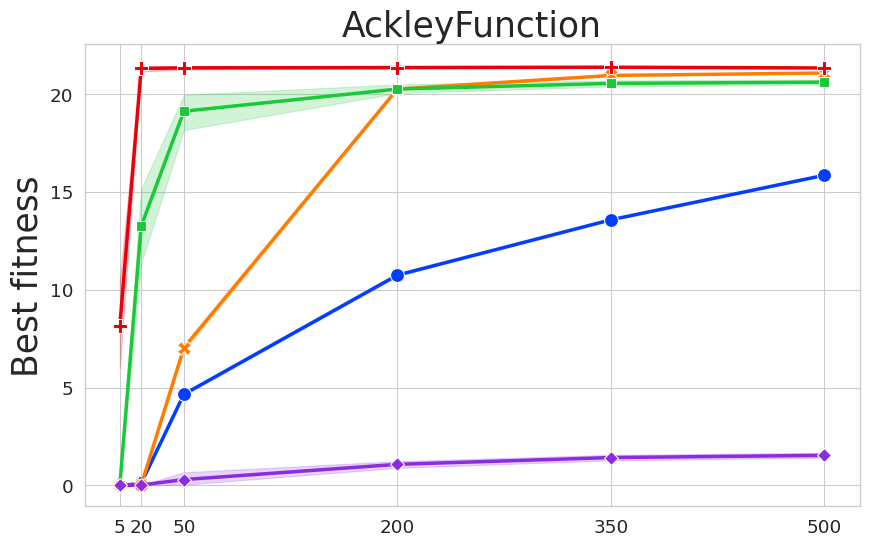

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


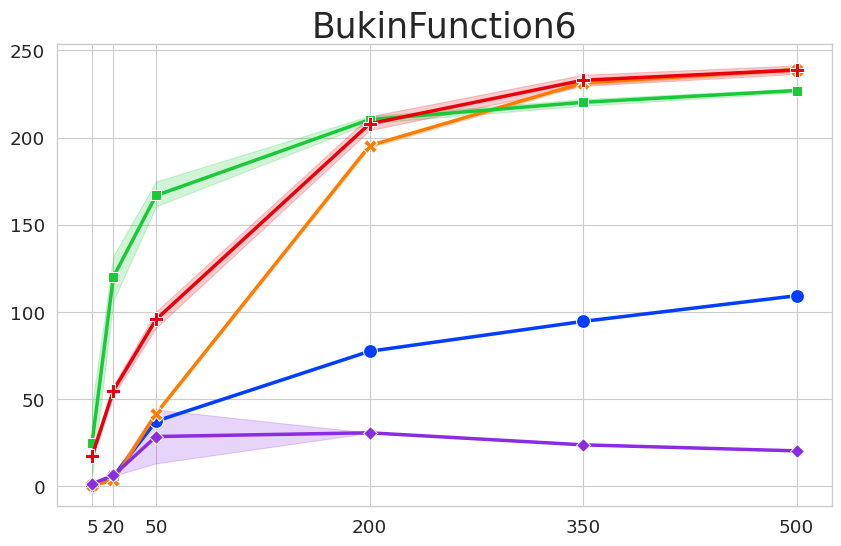

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


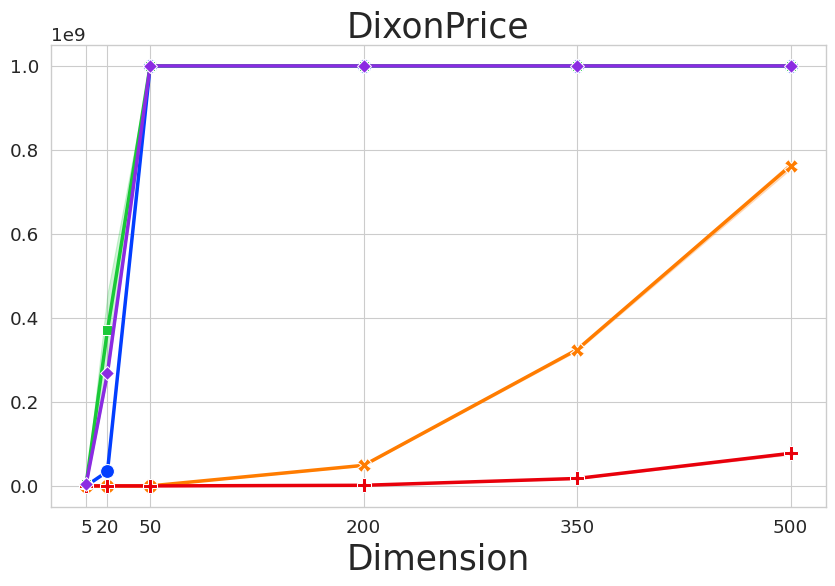

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


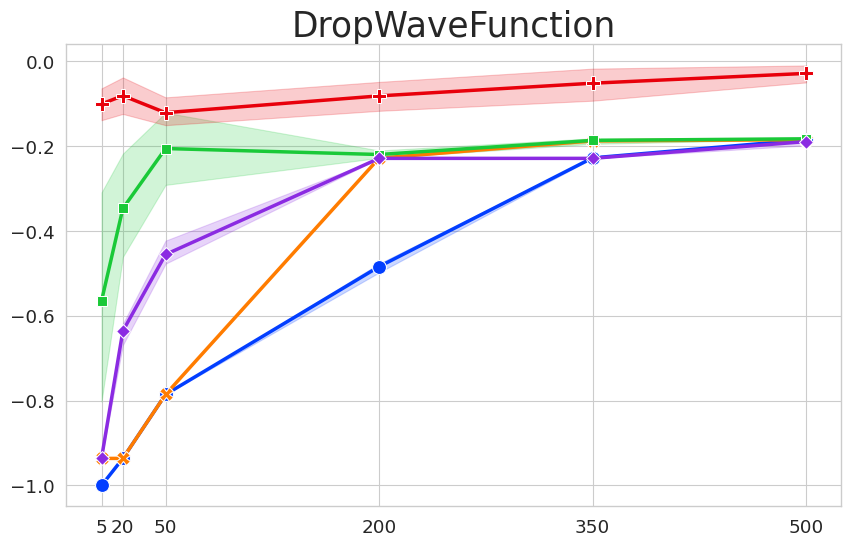

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


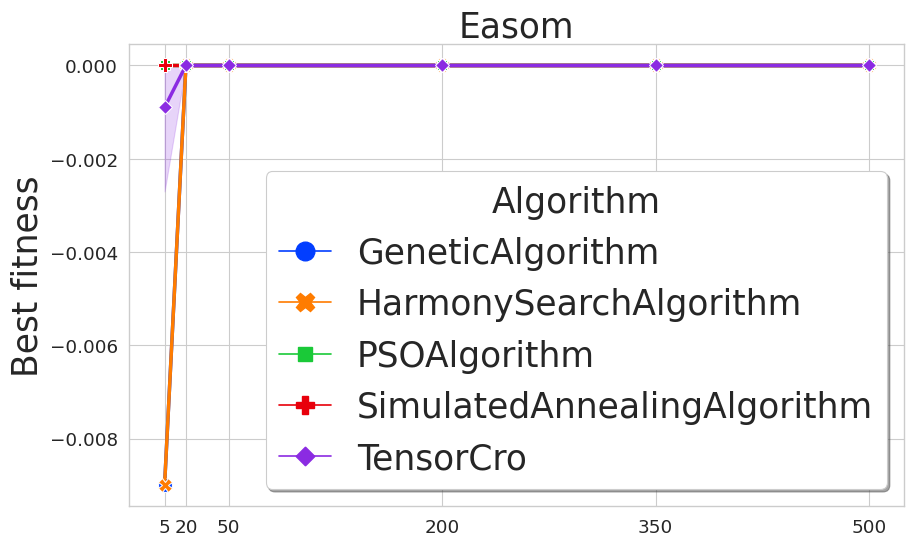

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


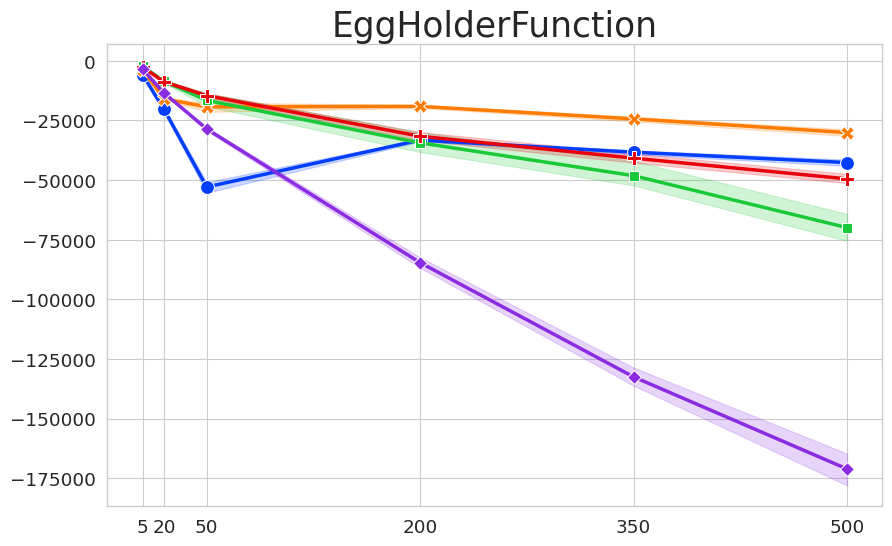

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


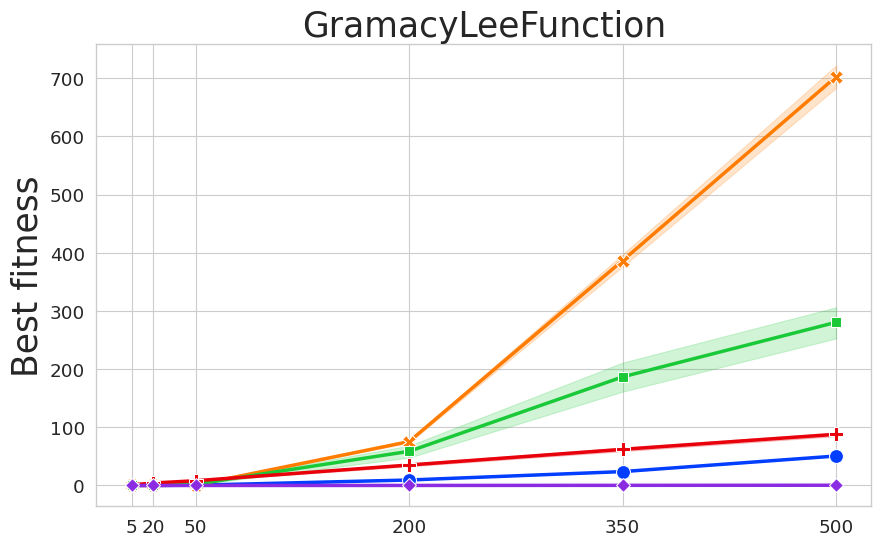

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


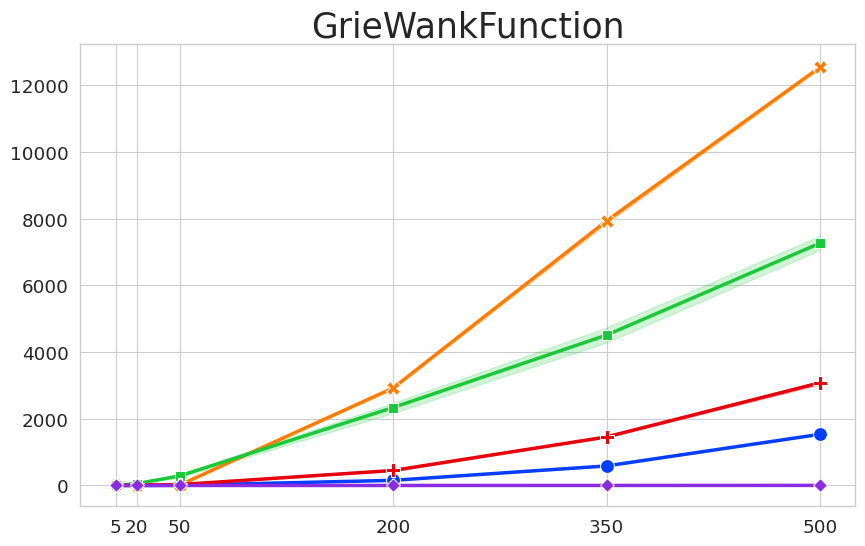

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


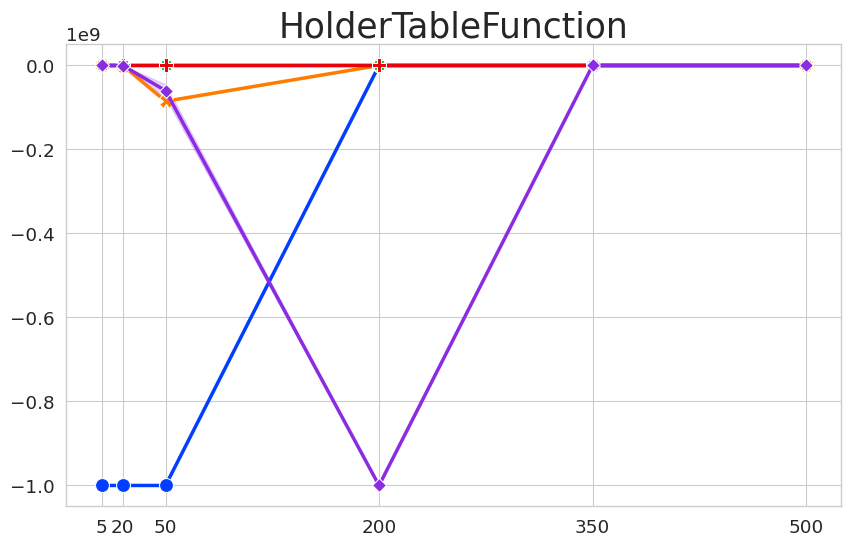

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


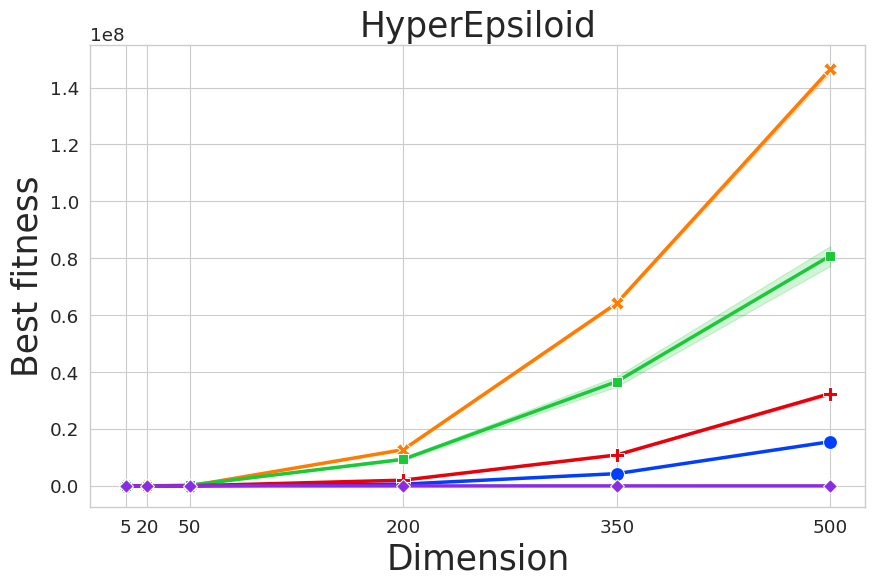

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


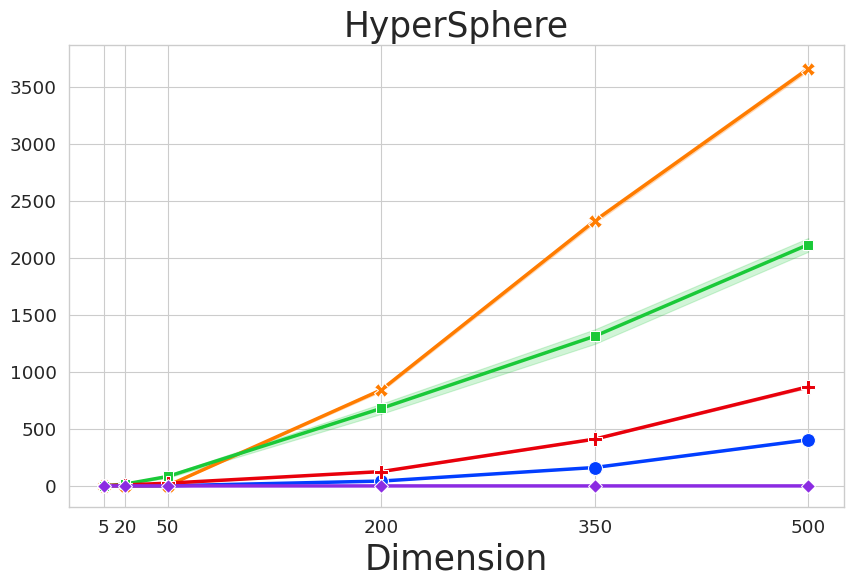

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


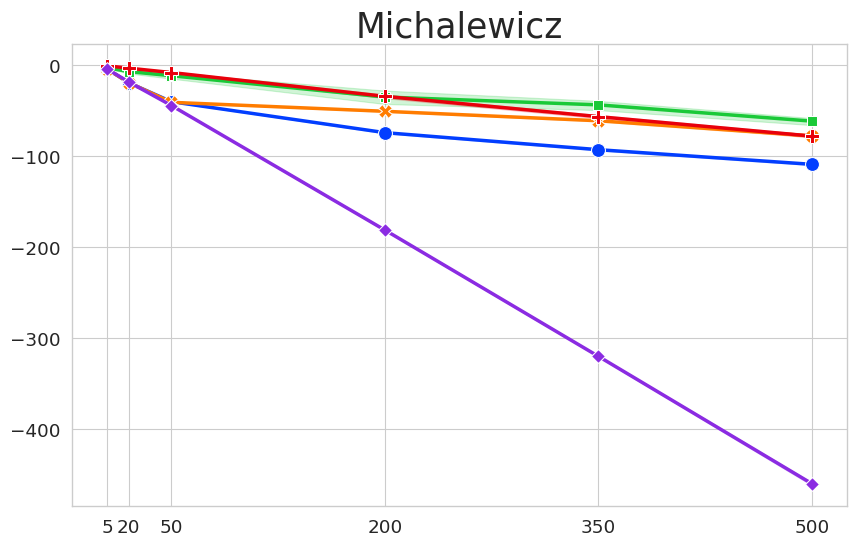

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


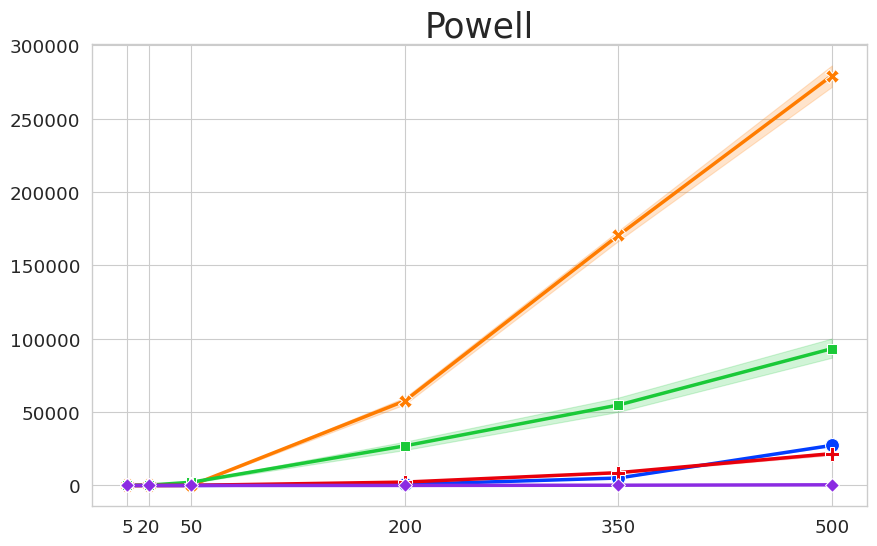

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


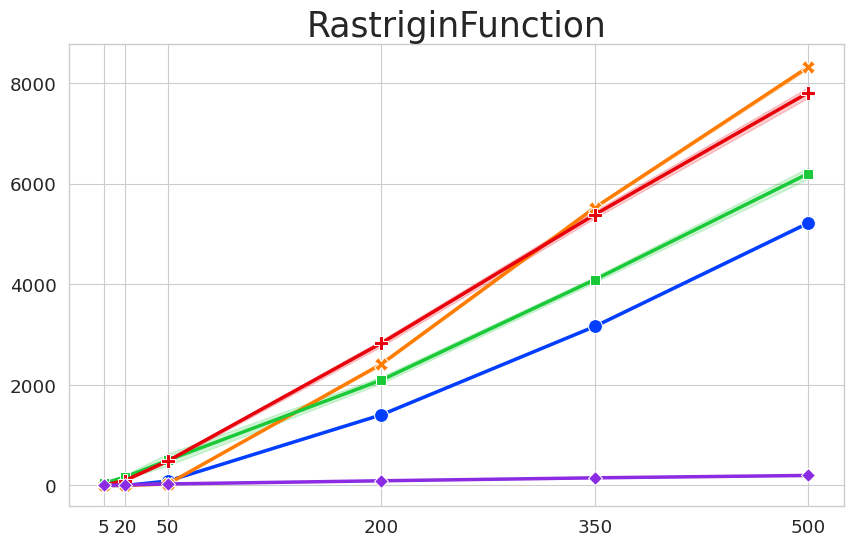

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


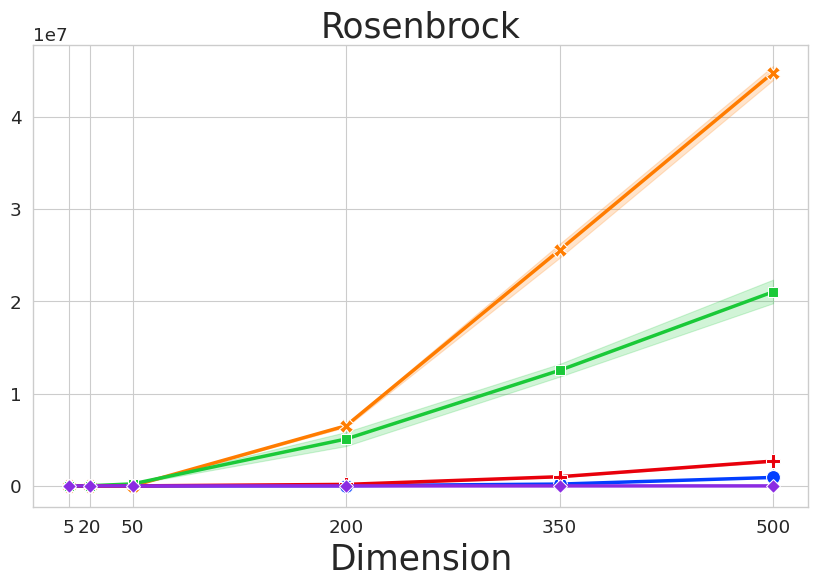

/tmp/ipykernel_111031/2820614746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_func.drop('function', axis=1, inplace=True)


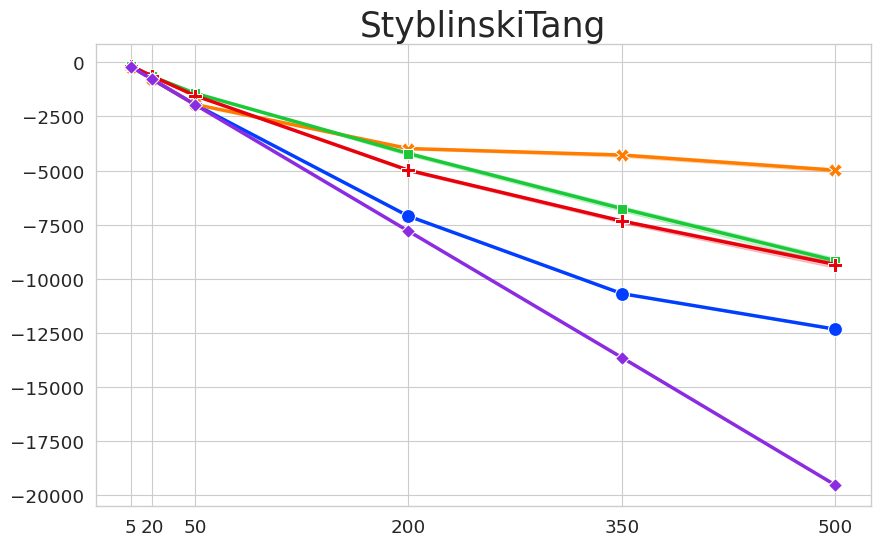

In [11]:
# Plot the score for each function (one in each subplot), it is a lineplot for each algorithm with x axis is the dimension:
for idx, func in enumerate(pdf['function'].unique()):
        # Set the style:
    sns.set_style('whitegrid')
    # Set the palette:
    sns.set_palette('bright')
    # Set the context:
    sns.set_context('paper', font_scale=1.5)
    # Set the figure size:
    plt.figure(figsize=(10, 6))
    # Filter the dataframe by function:
    this_func = pdf[pdf['function'] == func]
    this_func.drop('function', axis=1, inplace=True)
    # Plot the lineplot:
    sns.lineplot(data=this_func, x='dimension', y='best_fit', hue='algorithm', style='algorithm', markers=True, dashes=False, palette='bright',
                 markersize=10, linewidth=2.5)
    # Use SNS to put the legend INSIDE THE PLOT:
    plt.legend(loc=4, title='Algorithm', fontsize='xx-large',
               title_fontsize='xx-large', fancybox=True, shadow=True, ncol=1, markerscale=2.8, labelspacing=0.5,
               columnspacing=0.75, handletextpad=0.75, handlelength=1.5, framealpha=1)
    if func in ['AckleyFunction', 'GramacyLeeFunction', 'HyperEpsiloid', 'Easom']:
        plt.ylabel('Best fitness', fontsize='xx-large')
    else:
        plt.ylabel('')
    if func in ['DixonPrice', 'HyperSphere', 'HyperEpsiloid', 'Rosenbrock']:
        plt.xlabel('Dimension', fontsize='xx-large')
    else:
        plt.xlabel('')
    plt.xticks([5, 20, 50, 200, 350, 500])
    plt.title(func, fontsize='xx-large')
    # Deactivate legend for all the plots except the first:
    if func != pdf['function'].unique()[4]:
        plt.legend().remove()
    plt.savefig('./results/plots/' + func + '.png', dpi=300, bbox_inches='tight')
    plt.show()

In [12]:
# Many local minima functions:
from test_functions import AckleyFunction, BukinFunction6, DropWaveFunction, EggHolderFunction, \
        GramacyLeeFunction, GrieWankFunction, HolderTableFunction, RastriginFunction
# Bowl shape functions:
from test_functions import HyperEpsiloid, HyperSphere
# Valley shape functions:
from test_functions import DixonPrice, Rosenbrock
# Flat shape functions:
from test_functions import Easom, Michalewicz
# Other curious functions:
from test_functions import StyblinskiTang, Powell

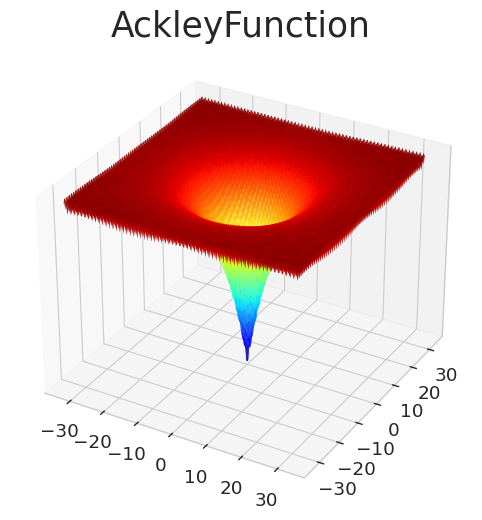

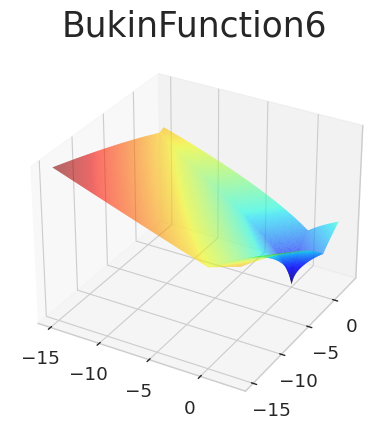

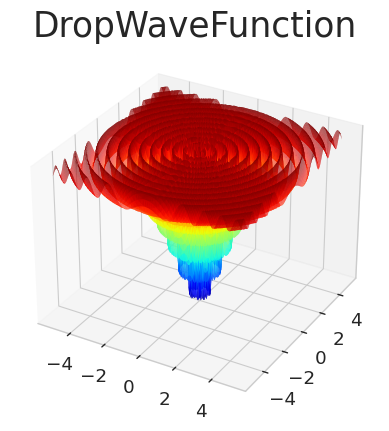

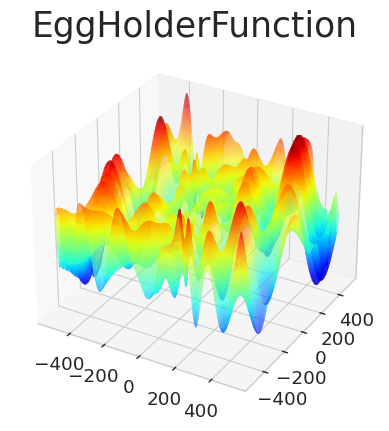

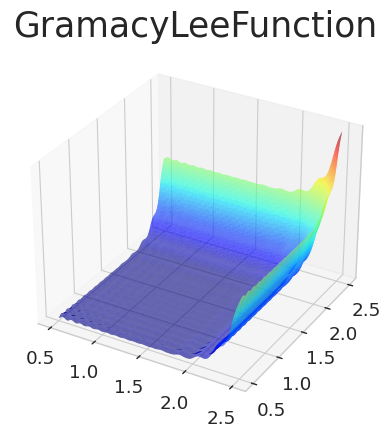

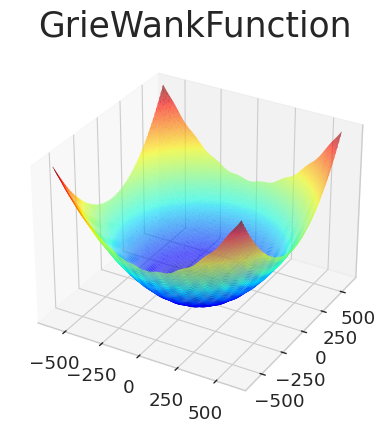

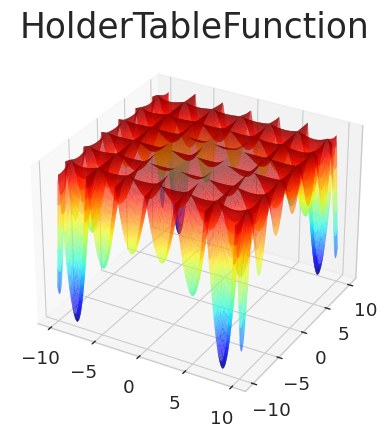

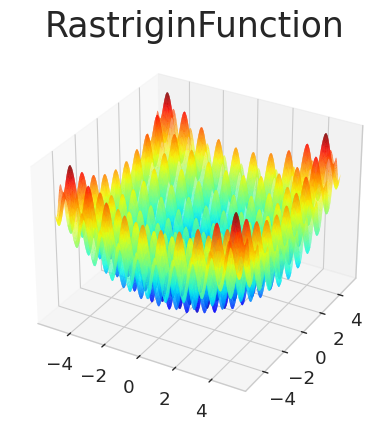

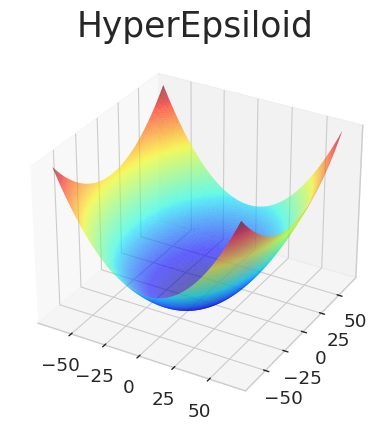

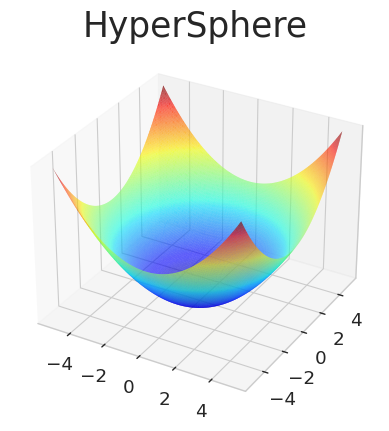

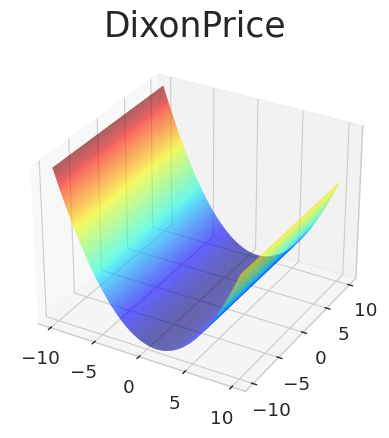

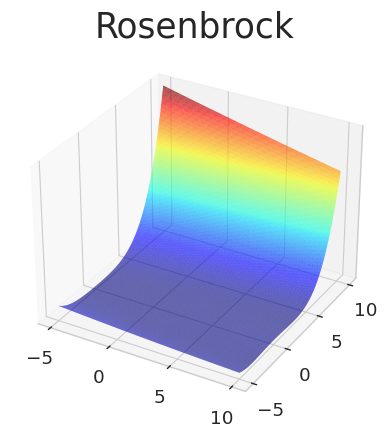

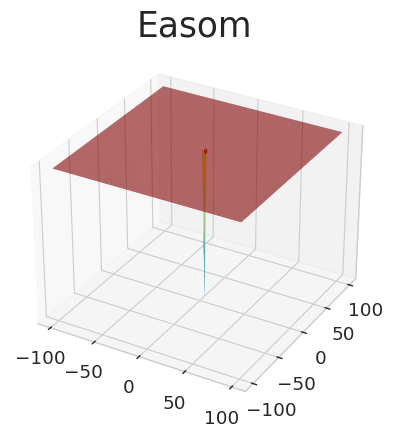

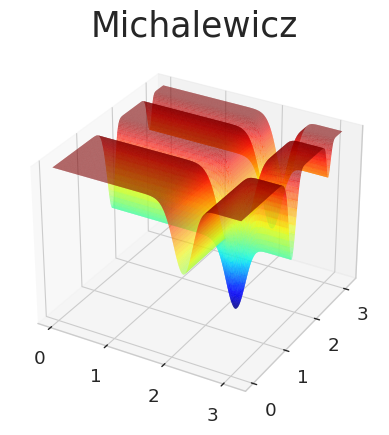

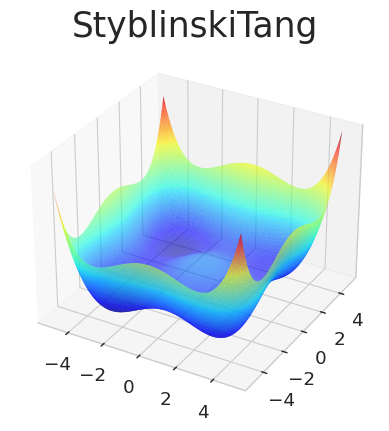

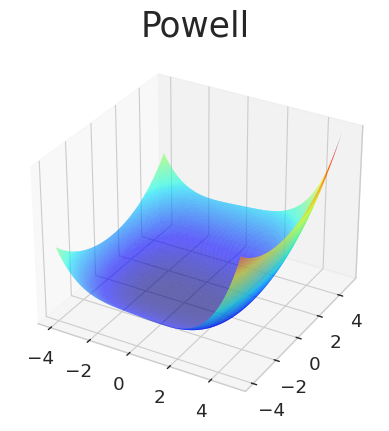

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


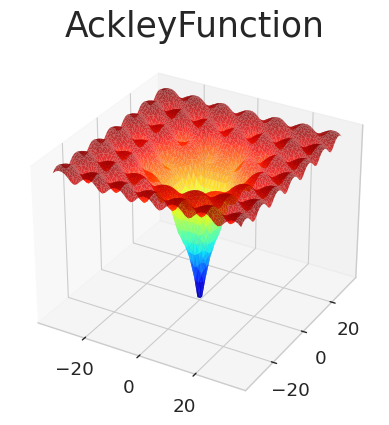

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


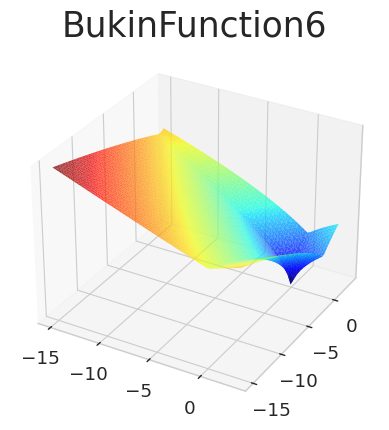

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


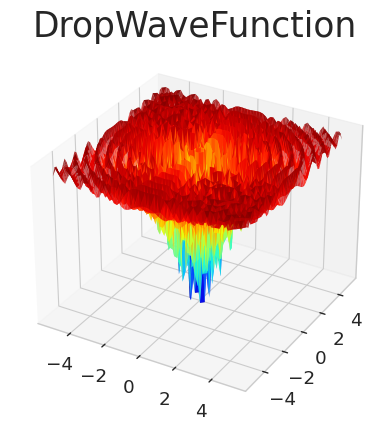

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


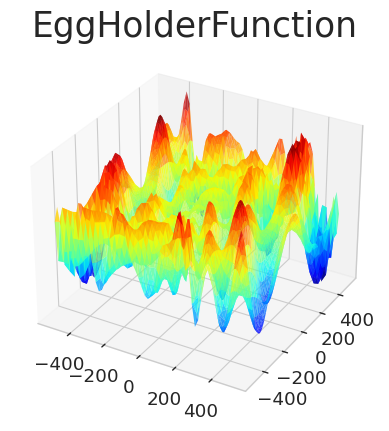

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


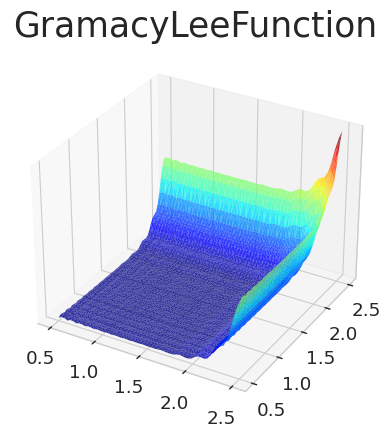

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


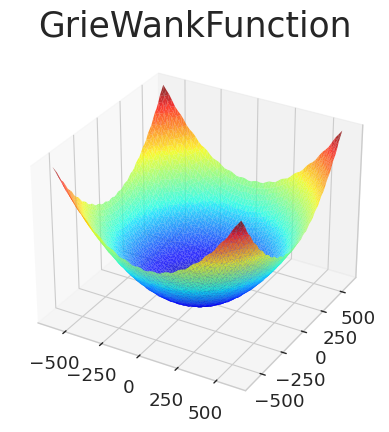

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


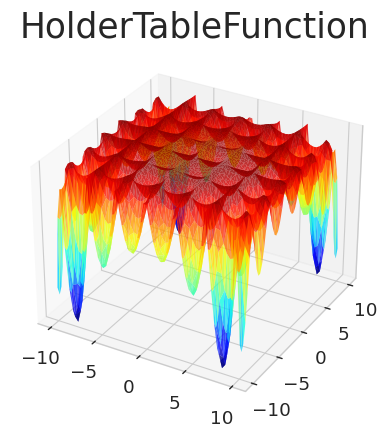

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


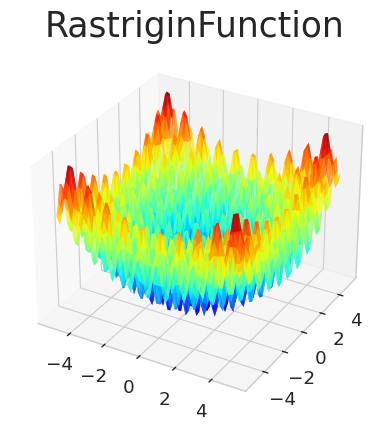

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


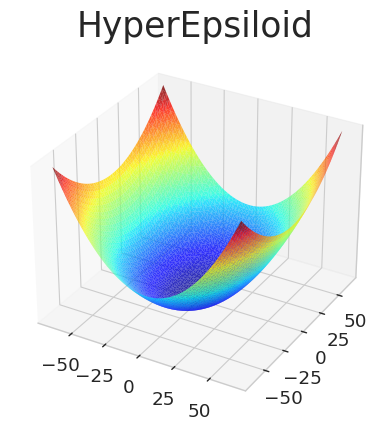

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


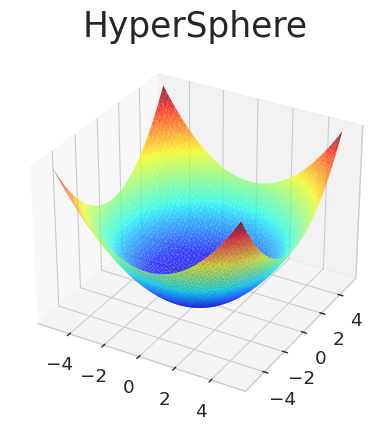

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


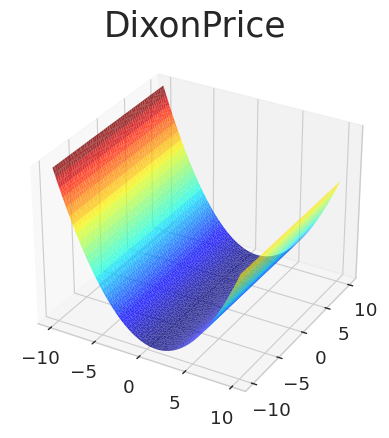

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


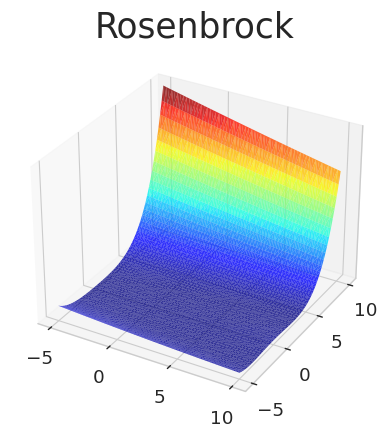

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


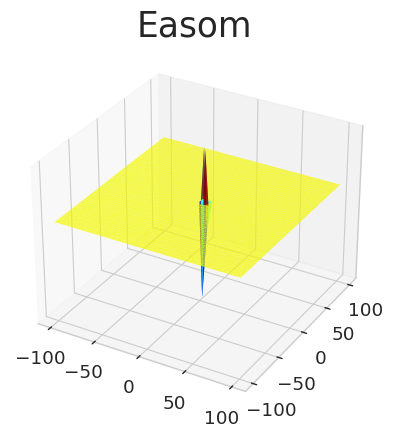

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


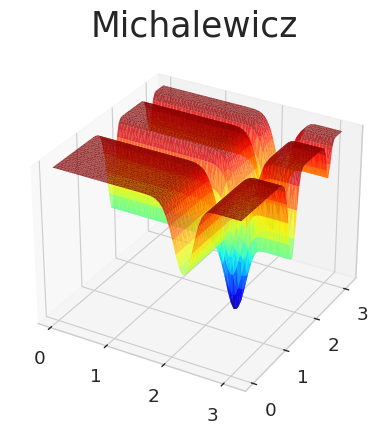

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


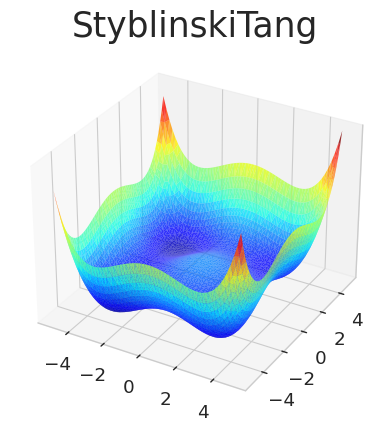

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


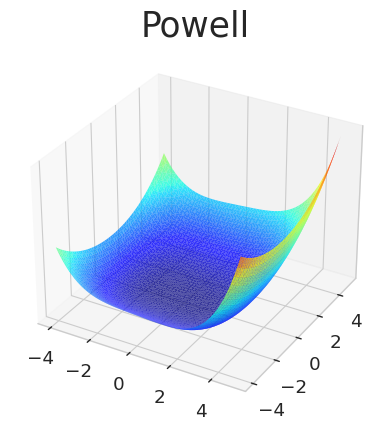

In [55]:
# Plot each function (2d):
FUNCTIONS = [AckleyFunction, BukinFunction6, DropWaveFunction, EggHolderFunction, GramacyLeeFunction, GrieWankFunction,
             HolderTableFunction, RastriginFunction, HyperEpsiloid, HyperSphere, DixonPrice, Rosenbrock, Easom,
             Michalewicz, StyblinskiTang, Powell]
# Set the style:
sns.set_style('whitegrid')
# Set the palette:
sns.set_palette('bright')
# Set the context:
sns.set_context('paper', font_scale=1.5)
# Set the figure size:
plt.figure(figsize=(10, 6))
# Set the number of points:
n_points = (200, 60)
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[0])
    y = np.linspace(minimum, maximum, n_points[0])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Plot the title:
    plt.title(func.__name__, fontsize='xx-large')
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots/' + func.__name__ + '.png', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()
# Plot the surface:
for func in FUNCTIONS:
    # Create the function:
    f = func()
    # Create the substrate:
    minimum, maximum = f.bounds
    # Build and array with all x, y combinations:
    x = np.linspace(minimum, maximum, n_points[1])
    y = np.linspace(minimum, maximum, n_points[1])
    x_grid, y_grid = np.meshgrid(x, y)
    grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])    
    # Evaluate the function:
    unstacked_ponts = f(grid)
    # Plot the surface:
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(grid[:, 0], grid[:, 1], unstacked_ponts, cmap='jet', edgecolor='none', alpha=0.8)
    # Plot the title:
    plt.title(func.__name__, fontsize='xx-large')
    # Disable zticks:
    ax.set_zticks([])
    # Save the plot in EPS style:
    plt.savefig('./results/func_plots/' + func.__name__ + '.eps', dpi=300, bbox_inches='tight', transparent=True)
    # Show the plot:
    plt.show()